In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
cpu4 = 'cpu4.csv'
g = 'g.csv'
rver_res_eth1out_curve_6  = 'rver_res_eth1out_curve_6.csv'
server_res_eth1out_curve_61 = 'server_res_eth1out_curve_61.csv'

BASE_FILE_DIR = '../data/raw/'

In [7]:
df_cpu4 = pd.read_csv(BASE_FILE_DIR + cpu4)

In [9]:
df_cpu4['timestamp'] = pd.to_datetime(df_cpu4['timestamp'], unit='s')

In [15]:
df_cpu4.label.unique()

In [32]:
df_cpu4.label.value_counts()

0    17359
1      209
Name: label, dtype: int64

<AxesSubplot:>

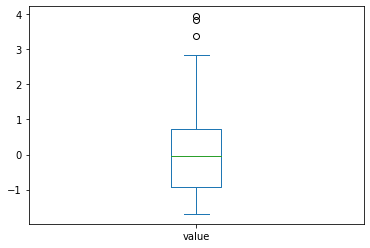

In [33]:
df_cpu4.value.plot.box()

<AxesSubplot:ylabel='Frequency'>

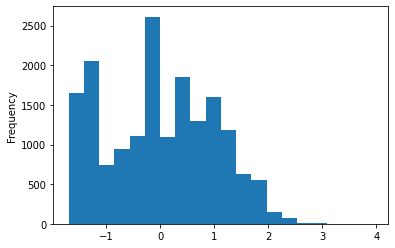

In [34]:
df_cpu4.value.plot.hist(bins=20)

label
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: value, dtype: object

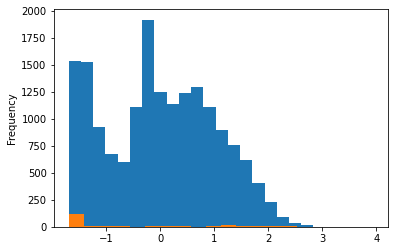

In [35]:
df_cpu4.groupby('label')['value'].plot(kind='hist', bins=20)

<AxesSubplot:ylabel='Frequency'>

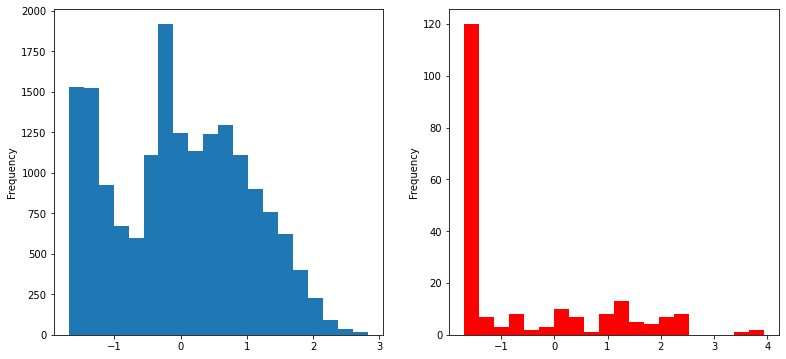

In [68]:
fig, ax = plt.subplots(1,2, figsize=(13,6))
df_cpu4[lambda d: d.label == 0].value.plot(kind='hist', bins=20, ax=ax[0])
df_cpu4[lambda d: d.label == 1].value.plot(kind='hist', bins=20, ax=ax[1], color='red')

<AxesSubplot:xlabel='timestamp', ylabel='value'>

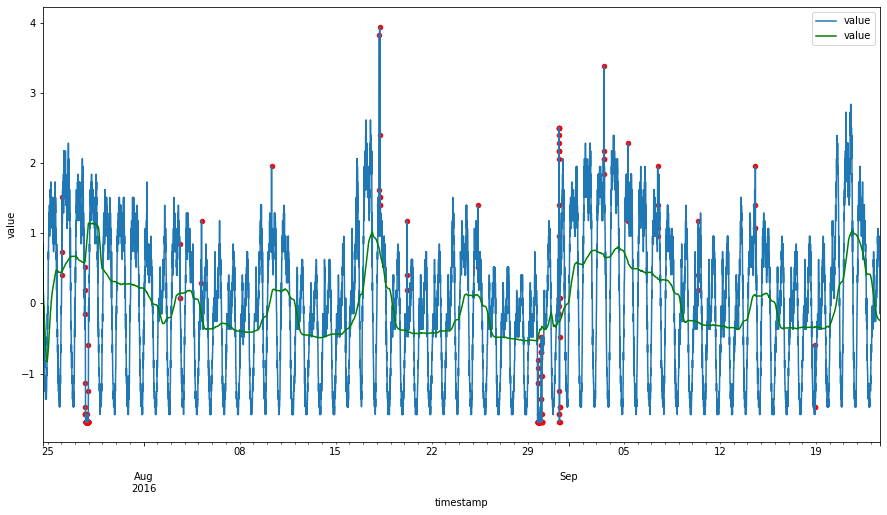

In [69]:
fig, ax = plt.subplots(1, figsize=(15,8))
df_cpu4.plot.line(x='timestamp', y='value', ax=ax)
df_cpu4[lambda r: r.label==1].plot.scatter(x='timestamp', y='value', color='red', ax=ax)
df_cpu4[lambda r: r.label==0].rolling('1D', on='timestamp').mean().plot.line(x='timestamp', y='value', color='green', ax=ax)

In [72]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# from sklearn.linear_model import SGDOneClassSVM
# from sklearn.kernel_approximation import Nystroem
# from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score

In [82]:
train_size = round(df_cpu4.shape[0] * 70 / 100)
test_size = df_cpu4.shape[0] - train_size

In [144]:
df_train = df_cpu4.iloc[:train_size]
df_test = df_cpu4.iloc[train_size:]

In [145]:
# training just with values

X_train = df_train.loc[:, [ 'value']]
y_train = df_train.label.apply(lambda d: -1 if (d == 1) else 1)

X_test = df_test.loc[:, ['value']]
y_test = df_test.label.apply(lambda d: -1 if (d == 1) else 1)

In [155]:
df_train.label.value_counts(normalize=True).values, df_test.label.value_counts(normalize=True).values

(array([0.98414376, 0.01585624]), array([0.99734345, 0.00265655]))

In [159]:
outliers_fraction = .015

In [162]:
# https://scikit-learn.org/stable/modules/outlier_detection.html#isolation-forest

models = [
    IsolationForest(n_estimators=10, random_state=42), 
    EllipticEnvelope(contamination=outliers_fraction),
    LocalOutlierFactor(novelty=True) # i think that is not ok
]

for model in models:
    print(type(model).__name__)
    model.fit(X_train)
    print(accuracy_score(y_train, model.predict(X_train)))
    print(accuracy_score(y_test, model.predict(X_test)))
    print(20*"=")

IsolationForest
0.4347048300536673
0.4275142314990512
EllipticEnvelope
0.9667425597658156
0.9717267552182163
LocalOutlierFactor
0.9842250772483331
0.9946869070208728
